/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1847889996356D+01   r2 =  0.1072201566293D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1847889996356D+01   r2 =  0.1072201566293D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1847889996356D+01   r2 =  0.1072201566293D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1847889996356D+01   r2 =  0.1072201566293D-15
 lsoda--  warning..internal t (=r1) 

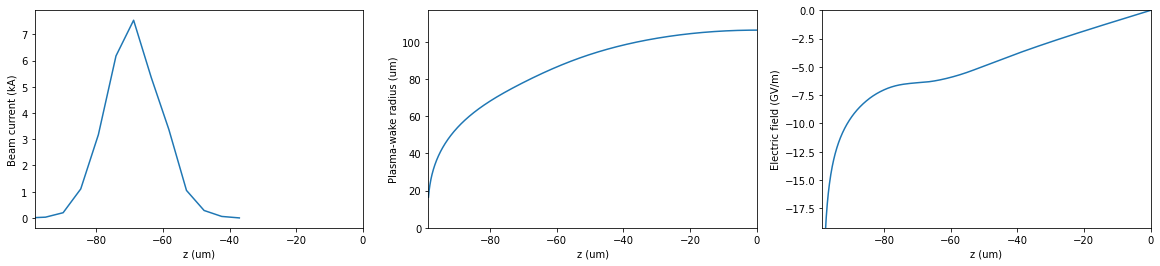

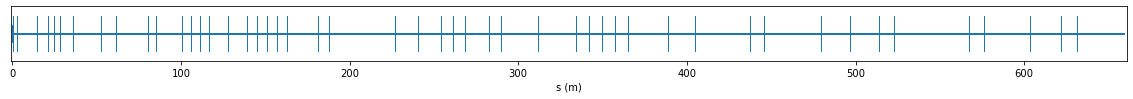

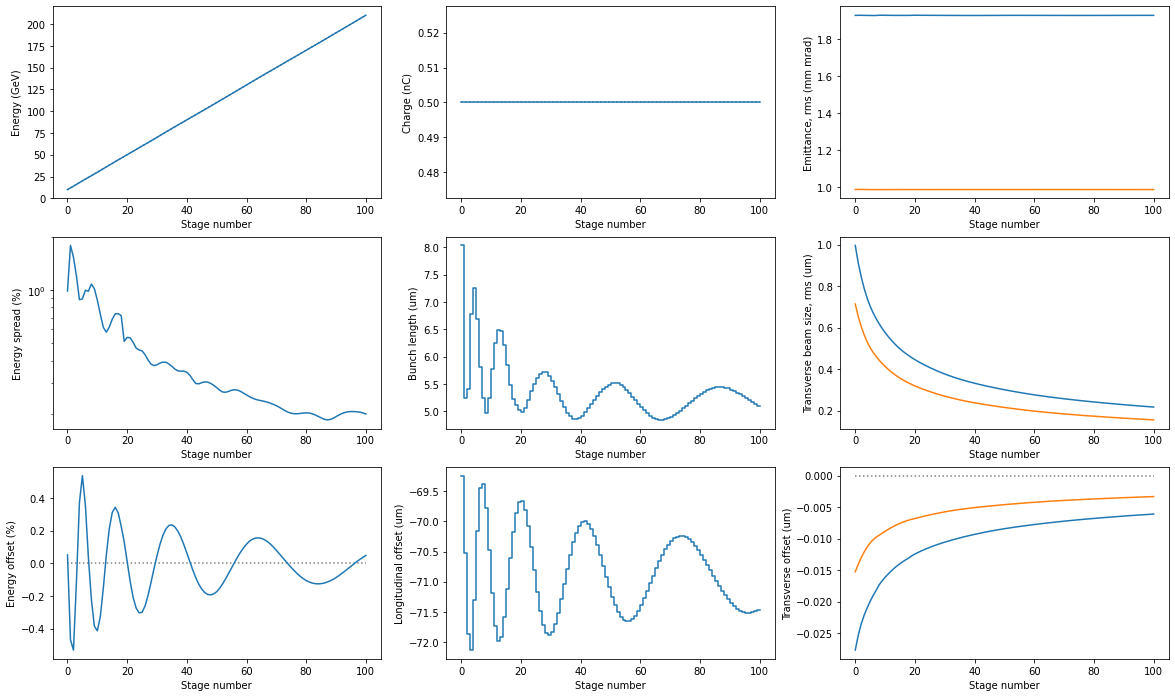

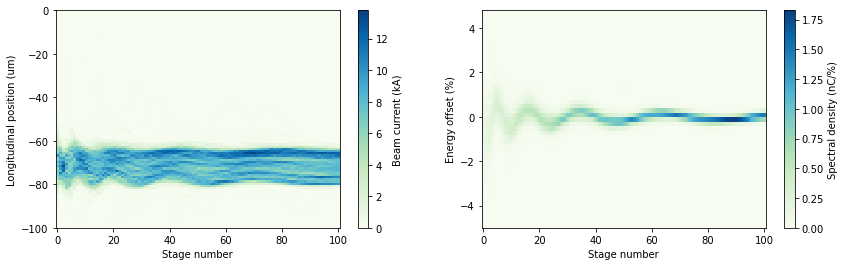

In [2]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, InterstageBasic, Linac
import numpy as np

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -0.5e-9 # [C]
source.E = 10e9 # [eV]
source.sigE = 0.01*source.E # [eV]
source.sigz = 8e-6 # [m]
source.z = -69e-6 # [m]
source.emitnx = 2e-6 # [m rad]
source.emitny = 1e-6 # [m rad]
source.betax = 10e-3 # [m]
source.betay = source.betax

# define stage
stage = StageNonlinear1D()
stage.deltaE = 2e9 # [eV]
stage.L = 0.3 # [m]
stage.n0 = 1e22 # [m^-3]
stage.kRb = 2

stage.plotWakefield(source.track())

# define interstage
interstage = InterstageBasic()
interstage.R56 = lambda E: -3e-4 * np.sqrt(10e9/E) # [m(eV)]
interstage.L = lambda E: 2 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = Linac(source = source, stage = stage, interstage = interstage, Nstages = 100)

# track particles
linac.track()

# plot survery and beam evolution
linac.plotSurvey()
linac.plotEvolution()
linac.plotWaterfalls()